## Spam Checker - ML Model

Author: Cesar Hanna

<br>

##### Importing the necessary libraries

In [4]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from colorama import Fore

##### This code takes the original dataset, wrangles it and creates a dataset that splits the message content from its category.

In [169]:
def create_dataset(dataset_path):
    # Reading the file into csv format:
    spam_dataset = pd.read_csv(dataset_path, sep="delimiter", header=None, engine='python', encoding='utf-8')

    # Initializing the required variables and lists:
    row = ""
    first_col = []
    second_col = []

    # Creating the dataset that entails 2 columns, Message Content and Category:
    for i in spam_dataset[0]:
        row = i.split("\t")
        first_col.append(row[0])
        second_col.append(row[1])
    new_df = pd.DataFrame(first_col, second_col).reset_index(drop=True)
    new_df_updated = new_df.rename(columns={0: 'Category'})
    new_df_updated['Message Content'] = second_col
    new_df_updated_reordered = new_df_updated[['Message Content', 'Category']]

    # Returning the dataframe for further processing:
    return new_df_updated_reordered

##### Using the raw data that is in the form of txt and creating the required dataset for further processing. The data is exctracted from UC Urvine Machine Learning Repository https://archive.ics.uci.edu/dataset/228/sms+spam+collection which contains real SMS labeled messages that have been collected for mobile phone spam research.

In [172]:
# Showing the dataframe created:
path = "C:\\Users\\cesar\\OneDrive\\Desktop\\CollectionSMSSpam.txt"
new_df_updated_reordered = create_dataset(path)
new_df_updated_reordered

,Message Content,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will ü b going to esplanade fr home?,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


In [174]:
# Calculating the average of spam and ham messages in the dataset:
def category_average_calculator(sample):
    temp_data = new_df_updated_reordered['Category'][:sample]
    count = 0
    for i in temp_data:
        if i == 'spam':
            count += 1
    average_spam = count/len(temp_data)
    average_ham = (len(temp_data)-count)/len(temp_data)
    return (average_spam, average_ham)

In [176]:
# Printing the result of the averages:
average_spam, average_ham = category_average_calculator(len(new_df_updated_reordered['Category']))
print('Average spam messages is {}{}'.format(round(average_spam*100, 2), "%"))
print('Average ham messages is {}{}'.format(round(average_ham*100, 2), "%"))

Average spam messages is 13.4%
Average ham messages is 86.6%


##### Visualizing the difference in count between spam and ham

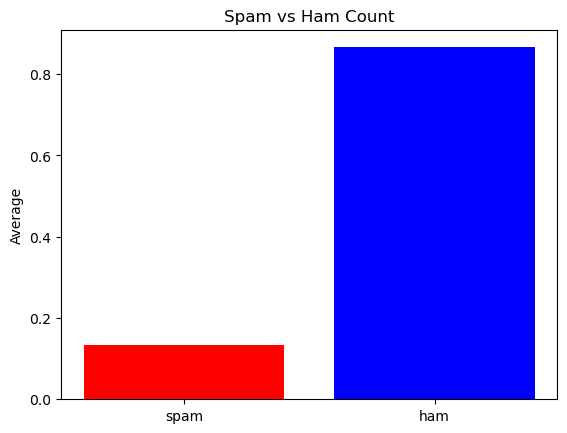

In [179]:
x = np.array(['spam', 'ham'])
y = np.array([average_spam, average_ham])

fig, ax = plt.subplots()

bar_colors = ['red', 'blue']

plt.bar(x, y, color=bar_colors)

ax.set_ylabel('Average')
ax.set_title('Spam vs Ham Count')

plt.show()

##### The following code cell creates a list of spam words taken from the dataset

In [182]:
def create_spam_words_list(df_reordered):
    # Intialize an empty list that will hold the spam words:
    words_list = []

    # Loop in the content and category and identify the spam messages, and append the spam words into the list:
    for i, j in zip(df_reordered['Message Content'], df_reordered['Category']):
        if j == 'spam':
            words_list.append(i.split(" "))

    #Merging the list of lists and words_list, into one big unified list:
    unified_spam_list = []
    for inner_list in words_list:
        unified_spam_list.extend(inner_list)
        
    # Return the unified spam list:
    return unified_spam_list

##### The following code cell creates a list of ham words taken from the dataset

In [185]:
def create_ham_words_list(df_reordered):
    # Intialize an empty list that will hold the ham words:
    words_list = []

    # Loop in the content and category and identify the spam messages, and append the ham words into the list:
    for i, j in zip(df_reordered['Message Content'], df_reordered['Category']):
        if j == 'ham':
            words_list.append(i.split(" "))

    #Merging the list of lists and words_list, into one big unified list:
    unified_ham_list = []
    for inner_list in words_list:
        unified_ham_list.extend(inner_list)

    # Return the unified ham list:
    return unified_ham_list

##### The following code removes unwanted words from the list before appending it into the dataframe

In [188]:
def remove_words(lst):
    # Identify the words to be removed from the dataframe:
    list_of_words_to_remove = ['and', 'a', 'the', '&', 'an', 'or', 'but', 'ffffffffff', 'i‘m', 'bx420-ip4-5we', 'ur', '8', '9', '<', '>',
        '-', ',', '.', '?', '2', '4', ';_;', 'in', 'on', 'at', 'to', 'from', 'for', 'with', 'by', 'of', '&amp;', "i'd", 'tsandcs', '#5000',
        'c', 'b', 'n', '!', '!!', '!!!', 'ü', 'u', '*', ':-(', ':-)', ':)', ':(', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'lccltd',
        '=', '+', '/', '*', '...', '.....', 'very', 'really', 'just', 'actually', 'literally', '3', '5', '6', '@', '1', '2', '16+', 'ú1',
        'is', 'am', 'are', 'was', 'were', 'be', 'being', 'been', 'have', 'has', 'had', '7', '8', '9', '&lt;url&gt;', "i'll", '4403ldnw1a7rw18',
        'oh', 'uh', 'um', 'well', 'like', 'so', ';v', '&lt;#&gt;', 'y', 'dat', 'lor', 'ard', '1', '(', ')', "''", 'us', '4', '7', 'poboxox36504w45wq',
        'my', 'me', 'that', 'your', "i'm", 'can', 'do', 'get', 'got', 'this', 'if', 'd', 'r', 'as', 'its', "i'll", 'then', 'n=qjkgighjjgcbl', '"',
        'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'o','p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'z', 'that\x92s', 'csh11', '150p', '18+6*1', '||',
        'received', 'would', 'should', 'could', 'or', "we've"]

    # Filter out the un-needed words:
    filtered_list = [item for item in lst if str(item).lower() not in list_of_words_to_remove]

    # Return the filtered list:
    return filtered_list

##### The following code cell creates a dataframe that entails the spam words count in a descending order

In [191]:
def spam_stats(df):
    # Create the list of spam words:
    uni_list = create_spam_words_list(df)

    # Remove the unwanted words from the list:
    clean_spam_list = remove_words(uni_list)

    # Remove the empty items from the list:
    for item in clean_spam_list:
        if item == "":
           clean_spam_list.remove(item)

    # Create a dataframe out of the spam list and count each spam word using groupby:
    clean_list_df = pd.DataFrame(clean_spam_list)
    lower_case = map(lambda x: x.lower(), clean_list_df[0])
    clean_list_lower = list(lower_case)
    clean_list_df_lower = pd.DataFrame(clean_list_lower)
    clean_list_df_lower.rename(columns = {0: 'spam words'}, inplace=True)
    clean_list_df_stats = clean_list_df_lower.groupby('spam words').size().reset_index(name='count').sort_values(by='count', ascending=False)

    # Return a clean list:
    return clean_list_df_stats

In [193]:
# Show the dataframe:
spam_df = spam_stats(new_df_updated_reordered)
spam_df

,spam words,count
1150,call,342
1646,free,180
3215,txt,136
3089,text,112
2217,mobile,109
...,...,...
1513,echo,1
1514,ecstacy.,1
1516,efreefone,1
1518,eh74rr,1


##### Visualizing the first 20 spam words

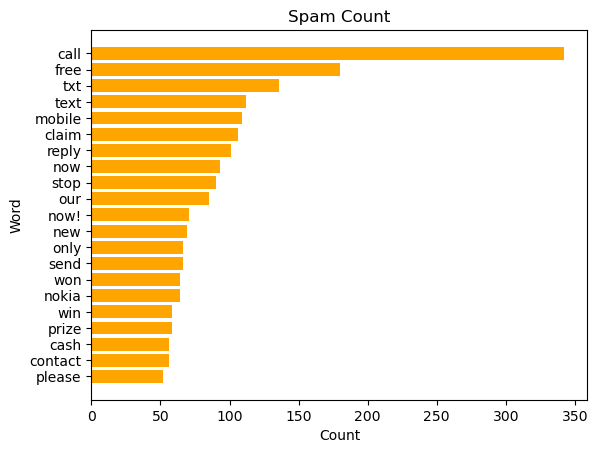

In [196]:
fig, ax = plt.subplots()

plt.barh(spam_df['spam words'][:21][::-1], spam_df['count'][:21][::-1], color ='orange')

ax.set_ylabel('Word')
ax.set_xlabel('Count')
ax.set_title('Spam Count')

plt.show()

##### The following code cell creates a dataframe that entails the ham words count in a descending order

In [199]:
def ham_stats(df):
    # Create the list of ham words:
    uni_ham_list = create_ham_words_list(df)

    # Remove the unwanted words from the list:
    clean_ham_list = remove_words(uni_ham_list)

    # Remove the empty items from the list:
    for item in clean_ham_list:
        if item == "":
           clean_ham_list.remove(item)

    # Create a dataframe out of the spam list and count each spam word using groupby:
    clean_ham_list_df = pd.DataFrame(clean_ham_list)
    lower_case = map(lambda x: x.lower(), clean_ham_list_df[0])
    clean_ham_list_lower = list(lower_case)
    clean_ham_list_df_lower = pd.DataFrame(clean_ham_list_lower)
    clean_ham_list_df_lower.rename(columns = {0: 'ham words'}, inplace=True)
    clean_ham_list_df_stats = clean_ham_list_df_lower.groupby('ham words').size().reset_index(name='count').sort_values(by='count', ascending=False)

    # Return a clean list:
    return clean_ham_list_df_stats

In [201]:
# Show the dataframe:
ham_df = ham_stats(new_df_updated_reordered)
ham_df

,ham words,count
6608,not,387
10454,will,336
10395,when,271
4630,how,246
9968,up,245
...,...,...
4354,"head,",1
4352,he...,1
4351,he.,1
4347,hdd,1


##### Visualizing the first 20 ham words

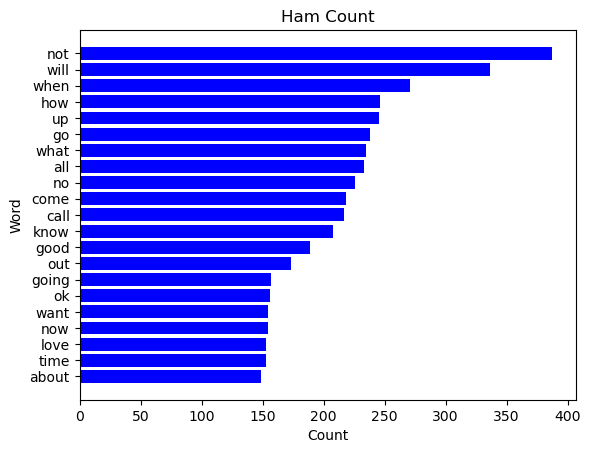

In [204]:
fig, ax = plt.subplots()

plt.barh(ham_df['ham words'][:21][::-1], ham_df['count'][:21][::-1], color ='blue')

ax.set_ylabel('Word')
ax.set_xlabel('Count')
ax.set_title('Ham Count')

plt.show()

##### WordCloud

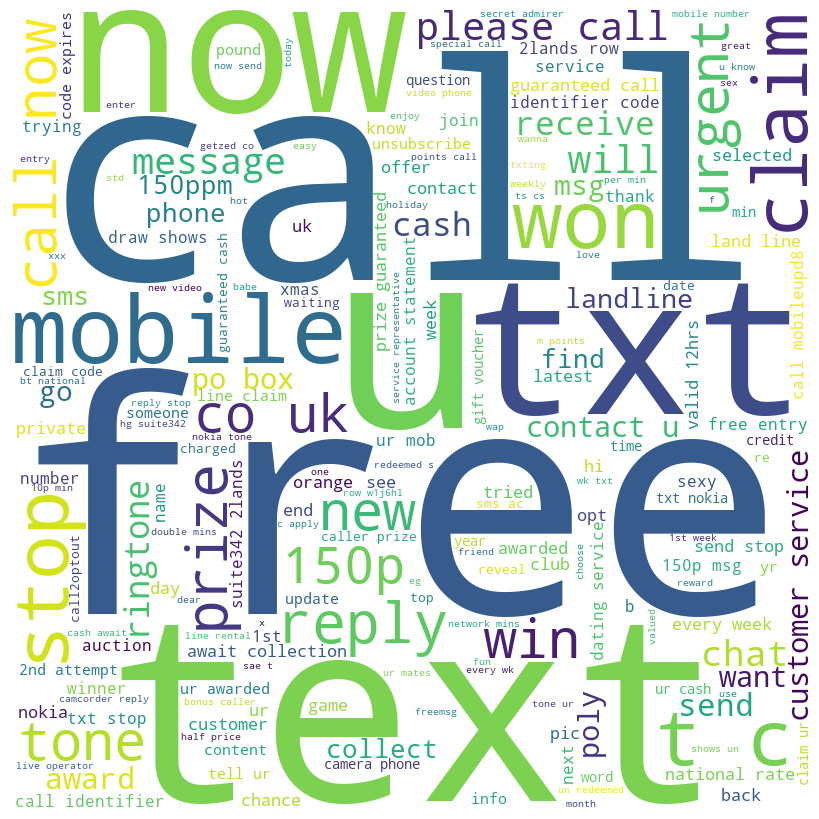

In [207]:
comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val, cat in zip(new_df_updated_reordered['Message Content'], new_df_updated_reordered['Category']):
    if cat == 'spam':
        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### The next part of this notebook creates the required dataframe to be used for fitting with a Machine Learning algorithm, in order to predict if the message is a spam or a ham

##### After looking into the data, the following code takes the message content, and creates a dataframe by splitting every word in a seperate column. It also adds the category of each message as the last column, in which it will be the target that I will use later on to fit my model, and the rest of the columns will be the features.
##### This code also calls another function to perform removal of certain filler words, which are not needed to fit the data.

In [211]:
def create_words_df(df_reordered):
    main_list = []
    cat_list = []

    for i, j in zip(df_reordered['Message Content'], df_reordered['Category']):
        words_list = []

        # Cleaning up the words in the message and splitting them by comma:
        split_word = i.replace(":)", " ").replace(">>", " ").replace(">", " ").replace("&amp;", " ").replace("-", " ").replace("(", " ").replace(")", " ") \
                        .replace("/", " ").replace(".", " ").replace("!", " ").replace("?", " ").replace("£", "").replace("$", "") \
                        .replace(" ", ",").split(",")

        # Appending the category list with the categories of each message:
        cat_list.append(j)

        # Filter out un-needed words, strip them and append them in the words list:
        remove_word = remove_words(split_word)

        for word in remove_word:
            word.rstrip("...").strip('&amp;').strip(".,!?-()")
            words_list.append(word.lower().replace("..", "").replace("...", "").replace(".", "").replace(",", "").replace("!","").replace("?", ""))

        # Removing the numbers that are greater than 0 from the list:
        for w in words_list:
            item = re.search(r"^[0-9]+", w)
            if item:
                words_list[words_list.index(w)] = ""

        # Appending the main list that contains all the cleaned up words lists:
        main_list.append(words_list)

    # Creating the category column:
    df = pd.DataFrame(main_list)
    df['category'] = cat_list

    # Renaming the columns:
    for col in range(0, len(df)):
        df.rename(columns={col: 'word{}'.format(int(col)+1)}, inplace=True)

    # Filling the NA with 0's:
    df_updated = df.fillna(0)

    return df_updated

In [213]:
words_df = create_words_df(new_df_updated_reordered)

# Replacing all the '' in the dataframe with 0:
words_df = words_df.replace('',0)

In [215]:
# Renaming the dataframe:
final_df = words_df

##### The following cell replaces the 'ham' with 0, and the 'spam' with 1

In [218]:
final_df['category'] = list(map(lambda item: int(item.replace('ham', '0').replace('spam', '1')), words_df['category']))

In [220]:
final_df

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,...,word124,word125,word126,word127,word128,word129,word130,word131,word132,category
0,go,until,jurong,point,0,crazy,0,0,available,only,...,0,0,0,0,0,0,0,0,0,0
1,ok,lar,0,0,0,joking,wif,oni,0,0,...,0,0,0,0,0,0,0,0,0,0
2,free,entry,wkly,comp,win,fa,cup,final,tkts,0,...,0,0,0,0,0,0,0,0,0,1
3,dun,say,early,hor,0,0,0,already,say,0,...,0,0,0,0,0,0,0,0,0,0
4,nah,don't,think,goes,usf,0,lives,around,here,though,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,time,tried,contact,0,won,0,pound,prize,0,...,0,0,0,0,0,0,0,0,0,1
5570,will,going,esplanade,fr,home,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,pity,0,mood,0,0,0,any,other,suggestions,0,...,0,0,0,0,0,0,0,0,0,0
5572,guy,did,some,bitching,acted,interested,buying,something,else,next,...,0,0,0,0,0,0,0,0,0,0


### This setion entails the ML model that we I am going to use for prediction

##### Creating the features and target dataset for training and testing

In [62]:
from sklearn.model_selection import train_test_split

In [224]:
from sklearn import preprocessing

# Identifying the features:
X = final_df.drop('category', axis=1)

# Replacing the categorical values with numerical in the features set, by using get_dummies() function in pandas:
X = pd.get_dummies(X)

# Identifying the target:
y = final_df['category']

##### Splitting the data into training and testing sets

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### XGBoost Model

##### Installing and importing the necessary packages and libraries

In [ ]:
!pip install xgboost

In [70]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

##### Converting the training and the testing sets to numpy arrays

In [231]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

##### Training the model

In [234]:
# Convert the dataset into DMatrix, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Set up the parameters for XGBoost
params = {
    'max_depth': 3,  # The maximum depth of a tree
    'eta': 0.1,  # The learning rate
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss'  # Evaluation metric
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

##### Making predictions

In [237]:
# Make predictions
y_pred_prob_xgb = xgb_model.predict(dtest)
y_pred_xgb = np.round(y_pred_prob_xgb)  # Convert probabilities to binary output

##### Model evaluation for XGBoost

In [240]:
# Check the accuracy of the trained model
xgboost_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost model: {xgboost_accuracy:.2f}")

Accuracy of XGBoost model: 0.92


#### Forward Neural Network (FNN) Model

In [ ]:
!pip install tensorflow

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

##### Create the Neural Network model

In [242]:
# Define the model
model = Sequential()

# Input layer and the first hidden layer with 64 units and ReLU activation
model.add(Input(shape=(X_train.shape[1],)))  # Define the input shape
model.add(Dense(64, activation='relu'))

# Second hidden layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with 1 unit and sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model (binary_crossentropy loss for binary classification)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │     1,608,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,610,497 (6.14 MB)

 Trainable params: 1,610,497 (6.14 MB)

 Non-trainable params: 0 (0.00 B)

##### Training the model

In [244]:
# Converting the integer type of the data to float
y_train = y_train.astype('float')
X_train = X_train.astype('float')

# Training the model
fnn_model = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8338 - loss: 0.3874 - val_accuracy: 0.8576 - val_loss: 0.2533
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9298 - loss: 0.1545 - val_accuracy: 0.9439 - val_loss: 0.1557
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9912 - loss: 0.0345 - val_accuracy: 0.9496 - val_loss: 0.1449
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9961 - loss: 0.0215 - val_accuracy: 0.9518 - val_loss: 0.1266
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9964 - loss: 0.0089 - val_accuracy: 0.9574 - val_loss: 0.1387
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9439 - val_loss: 0.1374
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9997 - loss: 0.0034 - val_accuracy: 0.9585 - val_loss: 0.1264
Epoch 8/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accu

##### Model evaluation for FNN

In [246]:
# Converting the integer type of the data to float
X_test = X_test.astype('float')

# Evaluate the model on the test data
y_pred_prob_fnn = model.predict(X_test)
y_pred_fnn = np.round(y_pred_prob_fnn)

# Calculate accuracy
fnn_accuracy = accuracy_score(y_test, y_pred_fnn)
print(f"Test Accuracy: {fnn_accuracy:.2f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test Accuracy: 0.96


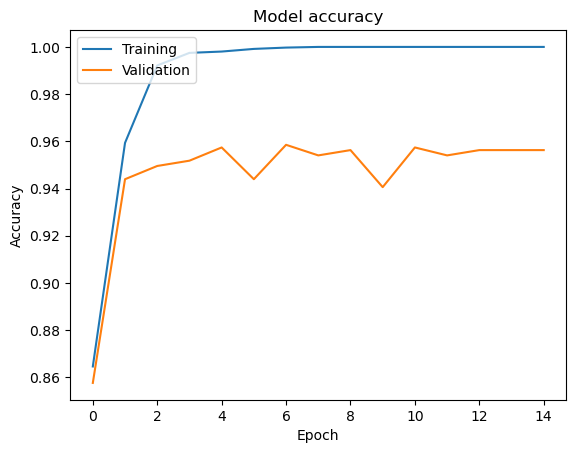

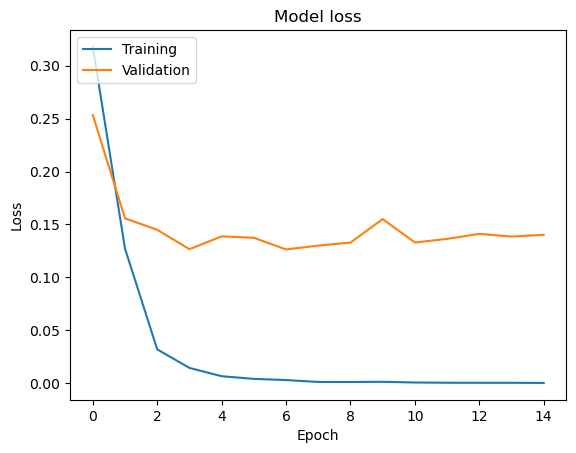

In [248]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(fnn_model.history['accuracy'])
plt.plot(fnn_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(fnn_model.history['loss'])
plt.plot(fnn_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

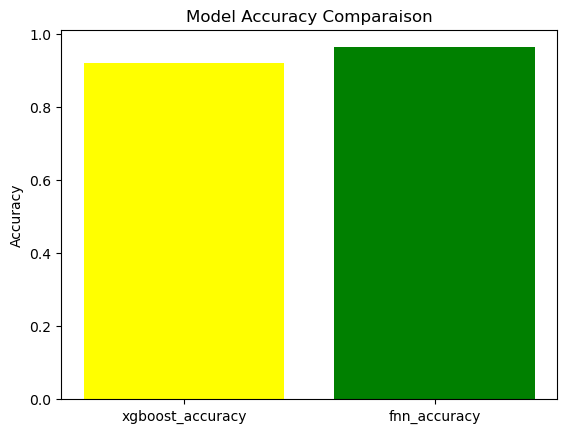

In [250]:
x = np.array(['xgboost_accuracy', 'fnn_accuracy'])
y = np.array([xgboost_accuracy, fnn_accuracy])

fig, ax = plt.subplots()

bar_colors = ['yellow', 'green']

plt.bar(x, y, color=bar_colors)

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparaison')

plt.show()

### This section entails the API creation from the model and use it to predict messages

#### API creation

##### Since the FNN model performs better than the XGB model, I am going to use it fro my API creation

In [107]:
import pickle

In [252]:
# Save to file in the current working directory
model_file = "C:\\Users\\cesar\\OneDrive\\Desktop\\fnn_model.pkl"
with open(model_file, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(model_file, 'rb') as file:
    trained_model = pickle.load(file)

In [254]:
# Calculate the accuracy score and predict target values
prediction = trained_model.predict(X_test)
y_pred = np.round(prediction)
acc_score = accuracy_score(y_test, y_pred)
print("Model test score: {0:.2f} %".format(100 * acc_score))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Model test score: 96.32 %


#### Model prediction application

In [256]:
def model_prediction(message, model):
    # Predict the mesage category:
    predict = model.predict(message)

    # Round the result:
    predict_message = np.round(predict)

    # Return ham if the result is 0. or spam if the result is 1.:
    if predict_message == [0.]:
       return "ham"
    if predict_message == [1.]:
       return "spam" 

In [258]:
def input_process_predict(message):
    # Including the category fieled in the message, so it can have the same format as the original X_train dataset.
        # This is needed to process the message using the same function that processes the original dataset:
    cat = ""

    # Identifying the original columns in which will be used to make sure the message and the original dataset are
        # aligned in terms of shape (the y coordinate should be the same).
        # Since X and X_train have the same number of columns, I am going to use X to avoid disrupting the model training if
        # the X_train is converted to Pandas:
    training_dataset_columns = pd.get_dummies(X).columns

    # Create a dataframe for the new message using the create_words function:
    message_df = pd.DataFrame([message, cat]).reset_index(drop=True)
    message_df_updated = message_df.T.rename(columns={0: 'Message Content', 1: 'Category'})
    processed_df = create_words_df(message_df_updated)
    processed_df = processed_df.replace('',0)
    processed_df = processed_df.drop('category', axis=1)
    
    # Convert the new message into dummy variables:
    message_dummyfied = pd.get_dummies(processed_df)
    
    # Adjust the message columns (number of columns) with original training dataset columns:
    message_dummyfied_adjusted = message_dummyfied.reindex(columns=training_dataset_columns, fill_value=0)

    # Identify the maximum length of the message, in which should be the length of the X_train dataset:
    max_len = len(training_dataset_columns)

    # Truncate the message to fit the maximum length expected by the model:
    if message_dummyfied_adjusted.shape[1] > max_len:
        message_dummyfied_adjusted = message_dummyfied_adjusted.iloc[:, :max_len]
    # Or pad the message if its length is less than the max length of the original dataset:
    elif message_dummyfied_adjusted.shape[1] < max_len:
        message_dummyfied_adjusted = message_dummyfied_adjusted.reindex(columns=training_dataset_columns, fill_value=0)

    # Predict the category of the message:
    pred_res = model_prediction(message_dummyfied_adjusted.astype('float'), trained_model)
    return pred_res

In [270]:
msg_pred = input("Enter message here:\n")
msg_pred_res = input_process_predict(msg_pred)
if msg_pred_res == 'ham':
    print(Fore.GREEN + "This message is {}".format(msg_pred_res))
elif msg_pred_res == 'spam':
    print(Fore.RED + "This message is {}".format(msg_pred_res))

Enter message here:
 We’re happy to inform you that you’re entitled to a refund for overpayment on your AMEX account. Click on this link [Link] below to claim your refund.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This message is spam


In [262]:
msg_pred = input("Enter message here:\n")
msg_pred_res = input_process_predict(msg_pred)
if msg_pred_res == 'ham':
    print(Fore.GREEN + "This message is {}".format(msg_pred_res))
elif msg_pred_res == 'spam':
    print(Fore.RED + "This message is {}".format(msg_pred_res))

Enter message here:
 Can't make it to dinner tonight. I am leaving work late


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This message is ham
